## When to use
#### 1) MCAR
#### 2) less than 5% data is missing

In [1]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [3]:
df.isnull().mean()    # What percentage of data is missing in each feature

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [4]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('Survived', axis = 1),
                                                 df['Survived'],
                                                test_size = 0.2, random_state = 1)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((712, 3), (179, 3), (712,), (179,))

In [5]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [6]:
mean_age,median_age,mean_fare,mean_fare

(30.166232394366194, 29.0, 31.87455466666662, 31.87455466666662)

In [7]:
X_train['mean_age'] = X_train['Age'].fillna(mean_age)
X_train['median_age'] = X_train['Age'].fillna(median_age)

X_train['mean_fare'] = X_train['Fare'].fillna(mean_fare)
X_train['median_fare'] = X_train['Fare'].fillna(median_fare)

In [8]:
X_train.sample(5)

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
837,NaN,8.050,0,30.166232,29.0,8.050,8.050
188,40.0,15.500,2,40.000000,40.0,15.500,15.500
416,34.0,32.500,2,34.000000,34.0,32.500,32.500
24,8.0,21.075,4,8.000000,8.0,21.075,21.075
751,6.0,12.475,1,6.000000,6.0,12.475,12.475


## While applying Mean/Median Imputation there should not be large change in varience
### here in case of Age there is a large change in varience so for age Mean/Median Imputation is not better idea to apply

In [9]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['median_age'].var())
print('Age Variance after mean imputation: ', X_train['mean_age'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['median_fare'].var())
print('Fare Variance after mean imputation: ', X_train['mean_fare'].var())

Original Age variable variance:  220.7125508594779
Age Variance after median imputation:  176.23102602680237
Age Variance after mean imputation:  176.0112747360393
Original Fare variable variance:  2179.2211148474044
Fare Variance after median imputation:  2080.7804077558935
Fare Variance after mean imputation:  2065.81579663453


## Change in distribution
### for Age distribution is changed, but for Fare its almost same and overlapping

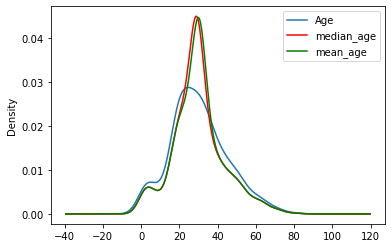

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['median_age'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['mean_age'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

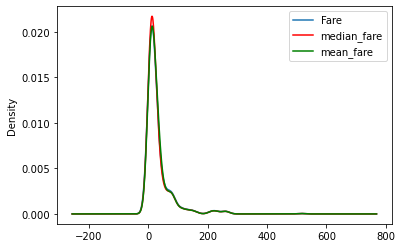

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['median_fare'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['mean_fare'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [12]:
X_train.cov()   # compare covarience of original data and data after Imputation

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,220.712551,80.290359,-5.974166,220.712551,220.712551,75.785411,75.994880
Fare,80.290359,2179.221115,17.962001,63.754196,65.792314,2179.221115,2179.221115
Family,-5.974166,17.962001,2.265902,-4.764208,-4.722243,17.027269,16.954058
mean_age,220.712551,63.754196,-4.764208,176.011275,176.011275,60.436467,60.603512
median_age,220.712551,65.792314,-4.722243,176.011275,176.231026,62.368522,62.464631
mean_fare,75.785411,2179.221115,17.027269,60.436467,62.368522,2065.815797,2065.815797
median_fare,75.994880,2179.221115,16.954058,60.603512,62.464631,2065.815797,2080.780408


In [ ]:
X_train

In [14]:
X_train.corr()   # compare correlation of original data and data after Imputation

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,1.000000,0.109163,-0.283794,1.000000,1.000000,0.106805,0.106628
Fare,0.109163,1.000000,0.253653,0.102470,0.105678,1.000000,1.000000
Family,-0.283794,0.253653,1.000000,-0.238561,-0.236312,0.248874,0.246911
mean_age,1.000000,0.102470,-0.238561,1.000000,0.999376,0.100227,0.100142
median_age,1.000000,0.105678,-0.236312,0.999376,1.000000,0.103366,0.103153
mean_fare,0.106805,1.000000,0.248874,0.100227,0.103366,1.000000,0.996398
median_fare,0.106628,1.000000,0.246911,0.100142,0.103153,0.996398,1.000000


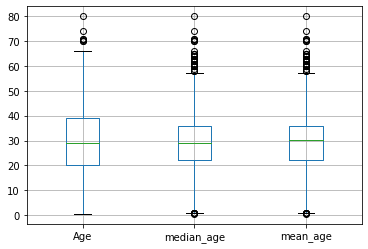

In [20]:
X_train[['Age','median_age','mean_age']].boxplot()  
# In original data there are less outliers, but after mean/median imputation outliers increased.
# so this also shows that here mean/median imputation didn't worked properly.

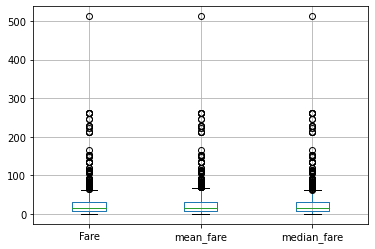

In [21]:
X_train[['Fare','mean_fare','median_fare']].boxplot() 
# In original data there are  outliers, and after mean/median imputation no. of outliers remained same.
# so this also shows that here mean/median imputation worked properly

# Imputation Using Sklearn

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('Survived', axis = 1),
                                                 df['Survived'],
                                                test_size = 0.2, random_state = 1)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((712, 3), (179, 3), (712,), (179,))

In [26]:
Imputer1 = SimpleImputer(strategy='median')
Imputer2 = SimpleImputer(strategy='mean')

In [27]:
trf = ColumnTransformer([
    ('imputer1',Imputer1,['Age']),
    ('imputer2',Imputer2,['Fare'])
   ], remainder='passthrough')

In [42]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [43]:
trf.named_transformers_['imputer1'].statistics_

array([29.])

In [44]:
trf.named_transformers_['imputer2'].statistics_

array([31.87455467])

In [57]:
X_train_transform = trf.fit_transform(X_train)
df_transformed = pd.DataFrame(X_train_transform, columns=['Age','Fare','Family'])

In [56]:
df_transformed

,median_age,mean_Fare,Family
0,29.0,23.2500,2.0
1,30.0,56.9292,0.0
2,34.0,10.5000,0.0
3,21.0,73.5000,2.0
4,62.0,10.5000,0.0
...,...,...,...
707,19.0,7.6500,0.0
708,30.5,7.7500,0.0
709,21.0,73.5000,0.0
710,29.0,7.5500,0.0
